# Python Exercises: NumPy, SciPy, and SymPy

Using NumPy, SciPy, and SymPy libraries to perform various calculations in Python.

1. Calculate √2 with 100 decimal places.

In [ ]:
import numpy as np
import sympy as sp

from sympy import N, sqrt
N(sqrt(2), 100)

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

2. Calculate 1/2 + 1/3 using rational arithmetic.

In [ ]:
from sympy import  Rational
x = Rational(1/3) + Rational(1/3)
x

6004799503160661/9007199254740992

3. Expand the expression (x + y)^6.

In [ ]:
from sympy import expand, symbols

x, y = symbols('x y')
expand((x+y)**6)


x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6

4. Simplify the trigonometric expression sin(x)/cos(x).

In [20]:

from sympy import *

x = symbols('x')
simplify(sin(x)/cos(x))

tan(x)

5. Calculate the limit of sin(x)/x as x → 0.

In [24]:
from sympy import *

x = symbols('x')
expr = sin(x)/x

print("Expression : {}".format(expr))

limit_expr = limit(expr, x, 0)
print("Limit of expression tends to 0: {}".format(limit_expr))

Expression : sin(x)/x
Limit of expression tends to 0: 1


6. Compute the derivative of log(x) with respect to x.

In [29]:
from sympy import *

expr = diff(log(x), x)
print("Derivative of log(x) with respect to x is: {}".format(expr))

Derivative of log(x) with respect to x is: 1/x


7. Solve the system of equations:
   2x + 3y = 5
   4x − 3y = −4

In [2]:
import numpy as np
A = np.array([[3, 4, -1],
             [1, -1, 2],
             [2, 1, 1]])

b = np.array([2, 7, 4])

np.linalg.solve(A, b)

array([-8.36382788e+15,  8.36382788e+15,  8.36382788e+15])

In [3]:
from sympy import Eq, solve
y = symbols('y')
solve([Eq(3*x + 4*y, ), Eq(4*x - 3*y, -4)], (x, y, z))

NameError: name 'symbols' is not defined

In [ ]:
import numpy as np
A = np.array([[3, 4],
             [4, -3],])

b = np.array([5, -4])

np.linalg.solve(A, b)

In [33]:
from sympy import Eq, solve
y = symbols('y')
solve([Eq(2*x + 3*y, 5), Eq(4*x - 3*y, -4)], (x, y))


{x: 1/6, y: 14/9}

8. Determine if there exist boolean values x, y that make the expression
   (x ∨ ¬y) ∧ (y ∨ ¬x) true. Use `sym.satisfiable` to justify your answer.

In [40]:
from sympy import  symbols, Or, Not, And, satisfiable
x, y = symbols('x y')
expr = And(Or(x, Not(y)), Or(y, Not(x)))
satisfiable(expr)

{y: False, x: False}

9. Solve the Bernoulli differential equation:
   x * df(x)/dx + f(x) − f(x)^2 = 0
   Also solve it using `hint='Bernoulli'` and compare the results.

In [41]:
from sympy import Function, dsolve, Eq
f = Function('f')
x = symbols('x')
dsolve(Eq(x * f(x).diff(x)+ f(x) - f(x)**2, 0), f(x), hint='Bernoulli')

Eq(f(x), 1/(C1*x + 1))

10. Using `scipy.integrate.quad()`, numerically compute the integral:
    I = ∫₀¹ cos(2πx) dx
    Explain why estimating the error of a numerical integral is important.

In [46]:
from scipy.integrate import quad
import numpy as np
result, error = quad(lambda x: np.cos(2*np.pi*x), 0, 1)
result, error


(3.746353726621705e-17, 7.116990625963435e-15)

11. Create a signal as a combination of sinusoidal waves at 50 Hz and 70 Hz (with a slight phase shift). Perform a Fourier transform and plot the magnitude of the discrete Fourier coefficients versus frequency. Observe peaks at 50 Hz and 70 Hz.

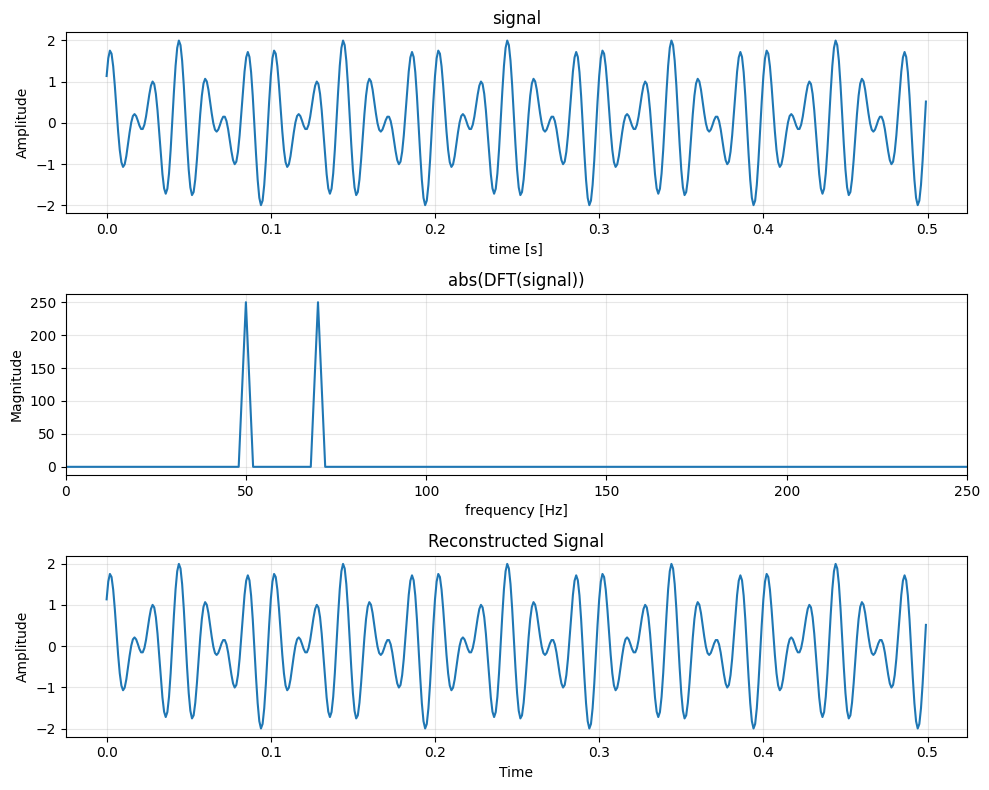

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000 # frecvența de eșantionare (Hz)
duration = 0.5 #durata semnaului
t = np.linspace(0, duration, int(fs*duration), endpoint=False) # vectorul de timp, start=0m stop=duration, numar de puncte=fs*duration

signal = np.sin(2*np.pi*50*t + 0.3) + np.sin(2*np.pi*70*t + 1.0) #Semnal compus din două sinusoide, cu frecvențele de 50 Hz și 70 Hz,  signal = semnalul combinat în domeniul timp.
fft_vals = np.fft.fft(signal) #transformata Fourier discretă a semnalului (complexă). Conține informația despre amplitudine și fază la fiecare frecvență.
freqs = np.fft.fftfreq(len(signal), d=1/fs) #vectorul frecvențelor corespunzătoare valorilor FFT. d=1/fs → intervalul de eșantionare.

mask = freqs >= 0 # FFT produce frecvențe pozitive și negative (simetrice pentru semnale reale). mask - doar frecvente pozitive

plt.figure(figsize=(10, 8))
#ubplot 1: semnalul în domeniul timp. grid cu transparență 0.3 pentru vizibilitate mai bună.
plt.subplot(3,1,1)
plt.plot(t, signal)
plt.grid(True, alpha=0.3)
plt.title("signal")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")

#subplot 2: magnitudinea DFT a semnalului. xlim setat la 250 Hz pentru vizualizare mai bună. np.abs(fft_vals) → amplitudinea fiecărei frecvențe.
#plt.xlim(0, 250) → afișăm frecvențele până la 250 Hz.
#Rezultatul arată două vârfuri principale la 50 Hz și 70 Hz (semnalele inițiale).
plt.subplot(3,1,2)
plt.plot(freqs[mask], np.abs(fft_vals)[mask])
plt.grid(True, alpha=0.3)
plt.title("abs(DFT(signal))")
plt.xlabel("frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 250)

#np.fft.ifft(fft_vals) → transformata inversă Fourier (revine în domeniul timp).
#.real → elimină eventualele părți imaginare foarte mici (numerice).
#Subplot 3: semnalul reconstruit ar trebui să fie identic cu cel original.
reconstructed = np.fft.ifft(fft_vals).real
plt.subplot(3,1,3)
plt.plot(t, reconstructed)
plt.grid(True, alpha=0.3)
plt.title("Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


12. Find the minimum value of x for the function:
    f(x) = cos(x) − 3 * e^(-(x−0.2)^2)
    Use `scipy.optimize.fmin()` starting from x0 = 1.0 and x0 = 2.0 to demonstrate how different starting points can lead to different local minima.

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32


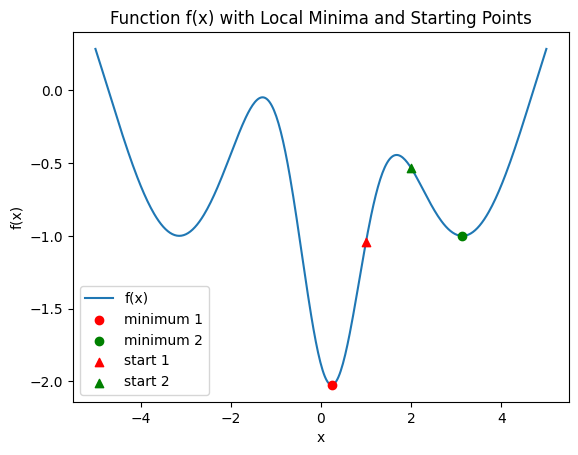

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def f(x):
    return np.cos(x) - 3 * np.exp(-(x - 0.2)**2)

x_vals = np.linspace(-5, 5, 400) #x_vals → 400 puncte între -5 și 5.
y_vals = f(x_vals) #valorile funcției la aceste puncte.

plt.plot(x_vals, y_vals, label="f(x)")# Graficul funcției f(x) pe intervalul [-5, 5].

x_min1 = fmin(f, 1.0) #găsește minimul local începând de la x=1.0
x_min2 = fmin(f, 2.0) #găsește minimul local începând de la x=2.0

plt.scatter(x_min1, f(x_min1), color='red', zorder=5, label="minimum 1") #marchează minimul găsit începând de la 1.0
plt.scatter(x_min2, f(x_min2), color='green', zorder=5, label="minimum 2")

#scatter → afișează punctele pe grafic.
plt.scatter(1.0, f(1.0), color='red', marker='^', zorder=5, label="start 1") #Mark the starting points
plt.scatter(2.0, f(2.0), color='green', marker='^', zorder=5, label="start 2") #Mark the starting points

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function f(x) with Local Minima and Starting Points")

plt.show()


13. Perform various image manipulations:
    - Rotate and change resolution of an image (using `scipy.ndimage`).
    - Add noise to the image.
    - Apply Gaussian, median, and Wiener filters.

matplotlib.pyplot → pentru afișarea imaginilor.

skimage.io → citirea imaginilor.

skimage.transform.rescale → redimensionarea imaginii.

skimage.util.random_noise → adăugarea de zgomot în imagine.

scipy.ndimage.gaussian_filter → filtrare Gaussiană (netezire).

scipy.ndimage.median_filter → filtrare mediană (reducerea zgomotului, păstrând marginile).

scipy.signal.wiener → filtru Wiener (reducere adaptivă a zgomotului).

        image[:, :, 0] înseamnă:
: → toate rândurile
: → toate coloanele
0 → selectează canalul roșu (Deci rezultatul este o matrice 2D cu valorile canalului roșu, pe care o putem trata ca o imagine grayscale simplificată.)

Creează o figură mare (16x6 inci).
plt.subplot(1,7,i) → 1 rând, 7 coloane, i = index.
cmap='gray' → afișare în tonuri de gri.
axis('off') → elimină axele.
tight_layout() → ajustează spațiile între subploturi.

/Users/alexandramanea/DeclarativeProgramming/.venv/lib/python3.13/site-packages/scipy/signal/_signaltools.py:1783: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/alexandramanea/DeclarativeProgramming/.venv/lib/python3.13/site-packages/scipy/signal/_signaltools.py:1783: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


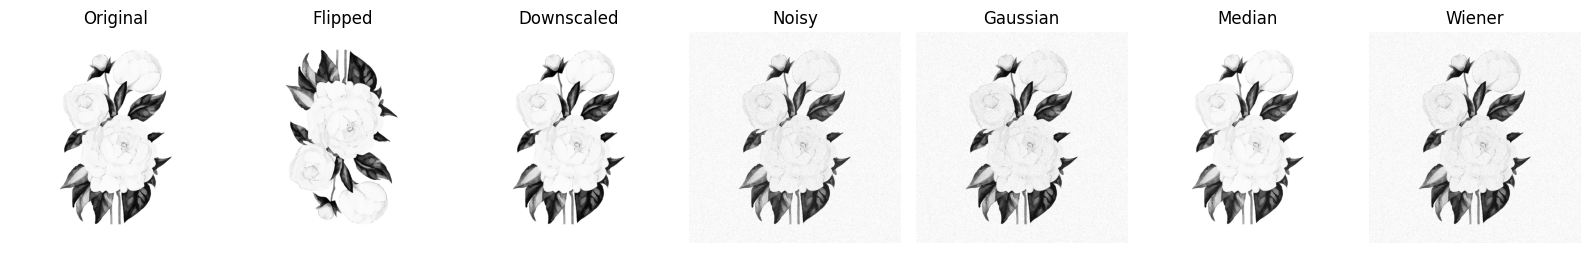

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter, median_filter
from scipy.signal import wiener

image = io.imread('flower.jpg')
image = image[:, :, 0] # Convert to grayscale

flipped = np.flipud(image) # Flip the image vertically
rescaled = rescale(image, 0.5, anti_aliasing=True) #Redimensionează imaginea la 50% din dimensiune.anti_aliasing=True → previne efectul de aliasing (păstrează calitatea la reducere).
noisy = random_noise(image, mode='s&p', amount=0.05) #Adaugă zgomot de tip salt-and-pepper (pixeli negri și albi) în proporție de 5%.
gaussian = gaussian_filter(noisy, sigma=1) #Neted, reduce zgomotul, dar poate estompa marginile. sigma=1 → definește cât de mult se netezește.
median = median_filter(noisy, size=3) #Înlocuiește fiecare pixel cu mediana pixelilor din vecinătate (3x3). Bun pentru reducerea zgomotului salt-and-pepper fără a estompa marginile.
wiener_f = wiener(noisy, (5,5)) #Filtru adaptiv: reduce zgomotul ținând cont de variația locală a imaginii (5x5 fereastră).

images = [image, flipped, rescaled, noisy, gaussian, median, wiener_f]
titles = ["Original", "Flipped", "Downscaled", "Noisy", "Gaussian", "Median", "Wiener"]

plt.figure(figsize=(16, 6))
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()